In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Solving a System of ODE Using Euler's Method

## Dimensionless Chua's Circuit

$$ \frac{dx}{dt} = \alpha [y - x - f(x)] $$

$$ \frac{dy}{dt} = x - y - z $$

$$ \frac{dz}{dt} = -\beta y $$

where

$$ f(x) = m_{1} x + 0.5(m_{0} - m_{1})(|x+1| - |x-1|) $$

In [16]:
# Initialise Variables:

Dt = 0.0005
t_start,t_end = 0,100
n_steps = int(round((t_end-t_start)/Dt))

x0,y0,z0 = 1.e-5,1.e-5,1.e-5
a,b,m0,m1 = 15.6,29.,-1.5,-0.714

In [17]:
# Define Functions

def fx(x,m0=m0,m1=m1):
    return m1*x + 0.5*(m0-m1)*(np.abs(x+1) - np.abs(x-1))

def dxdt(x,y,a=a):
    return a*(y-x-fx(x))

def dydt(x,y,z):
    return (x - y + z)

def dzdt(y,b=b):
    return -b*y

In [18]:
x,y,z = [np.zeros(n_steps+1) for _ in range(3)]
x[0],y[0],z[0] = x0,y0,z0

In [19]:
# Euler's Method

for i in range(1,n_steps+1):
    tx = x[i-1]
    ty = y[i-1]
    tz = z[i-1]
    dx = dxdt(tx,ty)
    dy = dydt(tx,ty,tz)
    dz = dzdt(ty)
    
    x[i] = tx+Dt*dx
    y[i] = ty+Dt*dy
    z[i] = tz+Dt*dz

C:\Users\U0018301\AppData\Local\Temp/ipykernel_14896/2888989744.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


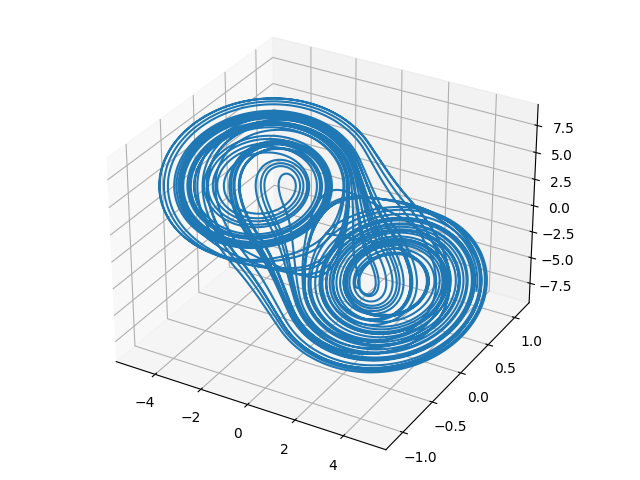

In [20]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.plot(x,y,z)

## Recreating Using `scipy.integrate.odeint` (equivalent of MATLAB `ode45`)

In [26]:
from scipy.integrate import odeint

def chua(v,t,a,b,m0,m1):
    def fx(x,m0=m0,m1=m1):
        return m1*x + 0.5*(m0-m1)*(np.abs(x+1) - np.abs(x-1))

    def dxdt(x,y,a=a):
        return a*(y-x-fx(x))

    def dydt(x,y,z):
        return (x - y + z)

    def dzdt(y,b=b):
        return -b*y
    
    x,y,z = v
    return [dxdt(x,y),dydt(x,y,z),dzdt(y)]

v0 = [x0,y0,z0]
t = np.linspace(0,100,100001)
sol = odeint(chua,v0,t,args=(a,b,m0,m1))

C:\Users\U0018301\AppData\Local\Temp/ipykernel_14896/3024624116.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


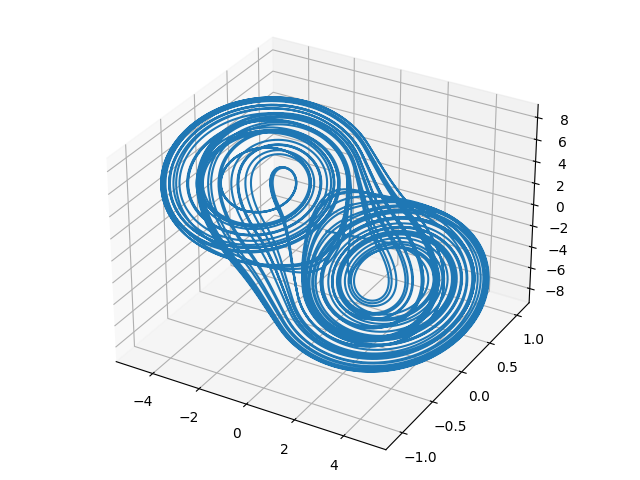

In [27]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.plot(sol.T[0],sol.T[1],sol.T[2])